In [1]:
# 출력이 너무 길어지지 않게하기 위해 찍지 않도록 했으나 
# 실제 학습 할 때는 아래 두 줄을 주석처리 하는 것을 권장한다.
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
print(pd.__version__)
print(np.__version__)

1.1.0
1.18.5


In [3]:
# pandas 설정: 모든 row와 모든 column을 출력하게 하고, 각 column 별 출력되는 글자수는 50자 이내
pd.set_option('display.max_rows', None, 'display.max_columns', None, 'display.max_colwidth', 50)

In [4]:
# 위의 설정으로 간단하게 보는 df_specific
df_specific = pd.read_csv("./data_wrangled/df_specific_wrangle.csv", encoding="utf-8")
df_specific.head(2)

,대학코드,대학명,gen_info,env_info,food_info,study_info,office_info,facil_info,mhct_info,help_info,etc_info
0,AR000004,Universidad del Salvador,아르헨티나의 대다수 대학교는 한국처럼 캠퍼스가 있는 것이 아니라 도시 내에 몇개의 ...,대학교가 도시 여러곳에 분포하고 있으므로 각기 다르다. 하지만 남녀를 불문하고 부에...,기숙사는 학교에서 제공하지 않고 두가지 옵션이 주어진다. 홈스테이 혹은 게스트 하우...,아르헨티나에서의 대학 수업은 주로 오전 혹은 저녁에 있다. 대부분의 학생들이 일을하...,EL SALVADOR대학교는 국제 교육부가 잘 되있는 학교이다. 아르헨티나 대학교들...,부대시설로는 헬스장이 있다고 알고 있으나 시내와 먼 곳에 있었다. 동아리는 몇가지 ...,딱히 컬쳐쇼크를 받을 만 한 요소는 없었던 것 같다. 하지만 처음에 언어적인 면에서...,"살바도르 대학교 국제처에서 비자문제나 숙소문제(홈스테이경우) 등은 해결해 주고, 특...",NaN
1,AU000019,Australian National University,"ANU has a very big campus, but unlike Yonsei, ...","The city center, called CIVIC, is 20min walk a...","There are many housing options, but I chose to...","In my personal opinions, classes are generally...","Overall, I did not have to ask for help much f...","There were many clubs for you to join at ANU, ...",I did have some culture shock during my first ...,"I was helped a lot, especially during the firs...","Overall, my stay in Australia has been nothing..."


In [5]:
# 위의 설정으로 간단하게 보는 df_specific
df_specific.tail(2)

,대학코드,대학명,gen_info,env_info,food_info,study_info,office_info,facil_info,mhct_info,help_info,etc_info
468,US000274,Whitworth College,내가 다녀온 교환대학은 Washington State 에 위치한 Whitworth ...,Whitworth College는 Seattle에서 비행기로 40분 정도 떨어져 있...,나는 Whitworth College에서 기숙사에 살았다. ISEP으로 가게 되면 ...,내가 미국에 가기 전에 가장 두려워했던 것은 바로 수업이었다. 어학연수와는 달리 교...,이 학교에서 내가 마음 편하게 지낼 수 있었던 것은 국제교육부 스텝들이 너무 따뜻하...,"기타 학교의 부대 시설로는 fitness center, music hall, soc...",NaN,NaN,처음에 Whitworth College를 ISEP으로부터 배정 받았을 때 현실적으로...
469,US000278,Wittenberg University,Wittenberg는 Ohio주의 작은 도시 Springfield에 위치해 있다. ...,"Springfield의 downtown에는 우체국, 은행(huntington) 정도...","1,2학년과 국제학생들 (1년 이하로 있는 학생들)은 모두 기숙사에서 생활하게 된다...",도서관은 Thomas library가 main이고 다른 단과대학 건물에 독서실이 있...,"국제교류부는 Hollenbeck 건물 1층에 있는데, Joann 과 Betsy 두 ...",Wittenberg의 가장 큰 장점. nWittenberg는 학비가 무척 비싼 학교...,"한국에서는 흔치 않은 gay, lesbian, transgender 등을 만날 수 ...",Wittenberg는 국제학생들에게 host family를 붙여준다. 비록 같이 살...,이처럼 wittenberg는 시골에 있는 작은 학교지만 지리적인 위치로 인한 단점보...


In [6]:
print(df_specific.columns)
print(df_specific.shape)

Index(['대학코드', '대학명', 'gen_info', 'env_info', 'food_info', 'study_info',
       'office_info', 'facil_info', 'mhct_info', 'help_info', 'etc_info'],
      dtype='object')
(470, 11)


In [7]:
# pandas 설정: 각 column 별 (혹은 한 cell에서) 출력되는 글자수 제한을 없애기
pd.set_option('display.max_colwidth', None)

In [8]:
import re
# removing junks from the string data
def remove_junk(str_data):
    str_data = str_data.replace("\\\\n", "")
    str_data = str_data.replace("\\n", "")
    str_data = str_data.replace("\n", "")
    str_data = str_data.replace("\\", "")
    str_data = str_data.replace("\\t", "")
    str_data = str_data.replace("NaN", "")

    # print(str_data) makes an error. too much of data
    # 한글, english 빼고 전부 날리기
    # str_data = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z|0-9|.,]', ' ', str_data)

    # 한글 빼고 다 날리기
    str_data = re.sub('[^가-힣ㄱ-ㅎㅏ]', ' ', str_data)

    # replace multiple spaces into single space
    str_data = ' '.join(str_data.split())
    return str_data

In [9]:
# accessing university info of given column (= accessing one cell)
def access_univ_info(dataframe, column, univ_code):
    df_row = dataframe.loc[dataframe["대학코드"] == univ_code]
    str_univ_info = df_row[column].to_string(index=False).lstrip()
    str_univ_info = remove_junk(str_univ_info)
    return str_univ_info

In [10]:
column_data = "gen_info"
univ_code = "DK000003"
str_example = access_univ_info(df_specific, column_data, univ_code)
str_example[:100]

'코펜하겐 대학교는 자연과학캠퍼스 인문캠퍼스 등 코펜하겐 시내 곳곳에 흩어져 있습니다 저는 조경건축 수업을 듣기 위해 에 위치한 자연과학 캠퍼스도 다니고 덴마크어 수업과 미디어커뮤니'

In [11]:
# collecting all column values into one string
def column_to_string(dataframe, column_name: str):
    str_corpus = dataframe[column_name].to_string(index=False).lstrip()
    str_corpus = remove_junk(str_corpus)
    return str_corpus

In [12]:
# collecting all column values into one string
corpus = column_to_string(df_specific, column_data)
print("글자수:", len(corpus))
corpus[:100]

글자수: 3985044


'아르헨티나의 대다수 대학교는 한국처럼 캠퍼스가 있는 것이 아니라 도시 내에 몇개의 건물이 대학교 건물이라서 수업에 맞는 건물로 수업을 들으러 가면 된다 도시의 대중교통이 꽤 잘 되'

In [13]:
info_list = ['gen_info', 'env_info', 'food_info', 'study_info', 'office_info', 'facil_info', 'mhct_info', 'help_info', 'etc_info']

In [14]:
# # count how many letters are tehre for each combined columns
# for info in info_list:
#     corpus_sample = column_to_string(df_specific, info)
#     print(info, len(corpus_sample))

## Tokenizing Sample Corpus

In [15]:
stopwords = []

In [16]:
# https://github.com/lovit/soynlp
from soynlp.tokenizer import RegexTokenizer, LTokenizer

tokenizer = LTokenizer()
tokenizer

In [17]:
column_data = "env_info"
# collecting all column values into one string
corpus = column_to_string(df_specific, column_data)
print("글자수:", len(corpus))
print(corpus[:100])

글자수: 3316342
대학교가 도시 여러곳에 분포하고 있으므로 각기 다르다 하지만 남녀를 불문하고 부에노스 아이레스에서 밤에 혼자 다니는 것은 위험하다 낮에는 대체적으로 사람들이 많이 다니므로 위험하지


In [18]:
# corpus is info column converted into one string
tokenized_corpus = tokenizer.tokenize(corpus)
print(f"number of tokenized words in a corpus are: {len(tokenized_corpus)}")
print(tokenized_corpus[:10])

number of tokenized words in a corpus are: 849199
['대학교가', '도시', '여러곳에', '분포하고', '있으므로', '각기', '다르다', '하지만', '남녀를', '불문하고']


In [19]:
from collections import Counter

In [20]:
tokenized_corpus_counted = Counter(tokenized_corpus)
print("number of counted words:", len(tokenized_corpus_counted))
common_words = tokenized_corpus_counted.most_common(300)
print(common_words)

number of counted words: 90231
[('수', 14856), ('있습니다', 12950), ('있는', 9087), ('학교', 7678), ('있고', 5146), ('때문에', 4994), ('분', 4895), ('있다', 4673), ('이', 4366), ('많이', 3986), ('큰', 3600), ('타고', 3595), ('있는데', 3354), ('갈', 3238), ('있어서', 3175), ('라는', 3064), ('그', 3016), ('가', 2890), ('버스를', 2778), ('정도', 2654), ('그리고', 2640), ('캠퍼스', 2553), ('바로', 2448), ('등', 2441), ('에', 2427), ('는', 2421), ('하지만', 2419), ('학교에서', 2394), ('있어', 2384), ('대학', 2379), ('매우', 2370), ('같은', 2368), ('것', 2332), ('할', 2302), ('등이', 2247), ('작은', 2159), ('가장', 2121), ('정말', 2058), ('거리에', 2052), ('주변에', 1993), ('를', 1987), ('한', 1980), ('많은', 1958), ('더', 1934), ('다', 1911), ('가면', 1899), ('잘', 1821), ('걸어서', 1755), ('자주', 1749), ('거의', 1744), ('다른', 1717), ('것이', 1712), ('좋은', 1710), ('에서', 1702), ('또한', 1694), ('주로', 1658), ('주변에는', 1623), ('저는', 1575), ('볼', 1513), ('때', 1497), ('합니다', 1494), ('와', 1485), ('조금', 1467), ('근처에', 1464), ('학생들이', 1464), ('있기', 1441), ('없습니다', 1427), ('위치해', 1392), ('가까운', 138

In [21]:
common_words_list, frequency_list = map(list, zip(*common_words))
print(common_words_list[:10])

['수', '있습니다', '있는', '학교', '있고', '때문에', '분', '있다', '이', '많이']


In [22]:
# removing possible significant words from common words
def filter_stopwords():
    stopwords_candidates = []

    for info in info_list:
        # info column series
        df_info = df_specific[info].fillna("")
        print(df_info.shape)
        
        # info column converted into one string
        corpus = column_to_string(df_specific, info)
        tokenized_corpus = tokenizer.tokenize(corpus)
        print(tokenized_corpus[:10])
        print(f"number of tokenized words in a corpus are: {len(tokenized_corpus)}")

        tokenized_corpus_counted = Counter(tokenized_corpus)
        print("number of counted words:", len(tokenized_corpus_counted))

        common_words = tokenized_corpus_counted.most_common(300)
        common_words_list, frequency_list = map(list, zip(*common_words))
        print(common_words_list[:10])    

        stopwords_candidates += common_words_list
        print(len(stopwords_candidates))

        for i in stopwords_candidates:
            if df_info.str.contains(i).sum() < 120:
                print(f"{i} word not appear in less than 1/4 of universities")
                stopwords_candidates.remove(i)
        
        print(len(stopwords_candidates))
        print(f"{random.sample(stopwords_candidates,10)} are random stopwords candidates")
        
        stopwords = stopwords_candidates
        
        with open("file.txt", "wt", encoding="UTF8") as output:
            output.write(stopwords)

In [54]:
# read stopwords genarated from filter_stopwords() function
stopwords_file = open('stopwords_kr.txt','rt', encoding='UTF8')
stopwords_txt = stopwords_file.read()
stopwords_list = stopwords_txt.strip('').split(', ')

# get human selected stopwords
stopwords_nogada_file = open('stopwords_nogada.txt','rt', encoding='UTF8')
stopwords_nogada_txt = stopwords_nogada_file.read()
stopwords_nogada = stopwords_nogada_txt.strip('').split(', ')

stopwords_list = stopwords_list + stopwords_nogada

## Tokenizing one column of university dataframe with soynlp

In [55]:
column_data = "env_info"
# df_column = df_specific[df_specific[column_data].notnull()]
df_column = df_specific[column_data].fillna("")

In [56]:
df_column.head(1)[:100]

0    대학교가 도시 여러곳에 분포하고 있으므로 각기 다르다. 하지만 남녀를 불문하고 부에노스 아이레스에서 밤에 혼자 다니는 것은 위험하다. 낮에는 대체적으로 사람들이 많이 다니므로 위험하지 않지만 외진곳은 피하는 것이 좋다. n학교 건물 주변에 편의점이나 공원등이 곳곳이 있으므로 공강시 이용이 편리하다.
Name: env_info, dtype: object

In [57]:
df_column.tail(1)[:100]

469    Springfield의 downtown에는 우체국, 은행(huntington) 정도 밖에 이용할 것이 없어서 쇼핑을 하려면 Columbus에 있는 대형 mall이나 fairfield에 있는 mall을 이용해야 한다. 학교에서 20분 정도 차를 타고 가면 fairborn이라는 작은 도시에 몇몇 한국 마트와 식당이 있어서 가끔 한국 음식이 그리울 때면 찾곤 했었다. springfield에 거주하는 한국인은 단 한명도 없다고 한다. 교환학생으로 파견되었던 나를 포함한 학생 세명이 전부이고, 심지어 옆 도시인 fairborn의 한국 식당에도 한국 사람은 없고, 거의 미국인이다. 화려한 대도시가 아니라서 싫어할 사람들도 있겠지만, 영어만 쓰기에 좋은 환경이고, 아시아인들이 거의 없어서 학교 밖에서도 사람들이 다들 먼저 관심을 보여주기 때문에 1년동안 즐겁게 생활할 수 있었다. n대중교통은 한번도 이용해 본적이 없는데, 버스는 75센트인데 자주 다니지 않아서 주로 차가 있어야 캠퍼스... 학교 주변은 한산한 Springfield 의 한 구석이다. 음악회, 연극 등의 문화행사들은 마을에서보다 학교 안에서 열리는 경우가 더욱 많으며 따라서 주민들이 주말이면 학교로 그런 행사들을 찾아 들어온다. Springfield 시내에 있는 큰 음악회관에서 열리는 정기적인 음악회나 공연 역시 주로 Wittenberg 의 후원 혹은 주최로 열리는 경우가 대부분이다. 마을에 교회들은 교파별로 상당히 다양하게 숫적으로도 많아서 음악을 전공하는 내 룸메이트는 자신이 관심있는 음악을 연주하는 교회들을 찾아서 골라다닐 수도 있을 정도였다. 이곳에 한국인이 거의 살지 않기 때문에, 알아보지는 않았지만 한인교회는 없는 듯 하다. 마을이 큰 화재 이후 상당히 침체되어 젊은 학생들에게는 지루한 곳으로 이야기된다. 그래서 휴일이나 방학 직전만 되면 Wittenberg 의 학생들은 집으로 떠나거나(많은 수의 학생들이 다른 주state 에서 온다. ) 어디로 놀러 갈 것인지가 학생식당에서의 주 관심

In [58]:
df_process = df_column.apply(remove_junk)

In [59]:
%time df_tokens = df_process.apply(tokenizer.tokenize)

CPU times: user 1.75 s, sys: 25.2 ms, total: 1.78 s
Wall time: 1.78 s


In [60]:
df_tokens.shape

(470,)

In [61]:
df_tokens[0:2]

0                                                                                                                                                                                                                                                                                                             [대학교가, 도시, 여러곳에, 분포하고, 있으므로, 각기, 다르다, 하지만, 남녀를, 불문하고, 부에노스, 아이레스에서, 밤에, 혼자, 다니는, 것은, 위험하다, 낮에는, 대체적으로, 사람들이, 많이, 다니므로, 위험하지, 않지만, 외진곳은, 피하는, 것이, 좋다, 학교, 건물, 주변에, 편의점이나, 공원등이, 곳곳이, 있으므로, 공강시, 이용이, 편리하다]
1    [캠퍼스, 자체는, 자연입니다, 정문에서, 걸어서, 분, 정도면, 라고, 생긴지, 얼마, 안된, 큰, 쇼핑센터가, 있구요, 마트, 영화관, 클럽, 등, 전부, 가까워요, 물론, 캔버라, 자체가, 작은, 도시입니다만, 그래서, 기숙사에만, 거주하신다면, 대중교통을, 거의, 이용할, 필요, 없다는, 장점이, 있습니다, 행정, 수도기, 때문에, 웬만한, 것은, 다, 갖추어져있기도, 하구요, 또, 이라는, 커다란, 인공, 호수와, 아주, 가까운데요, 정말, 아름다운, 호수입니다, 조깅, 자전거, 라이딩, 도로를, 따라, 내려가면, 작은, 들판이, 나오는데요, 거기서, 보았던, 노을은, 평생, 잊을, 수, 없을, 듯, 합니다, 대학교, 주변에, 센터가, 있고, 그, 곳에, 술집과, 영화관, 카페, 등이, 있지만, 거기를, 빼고는, 사실, 놀거리가, 많지는, 않습니다, 연세대, 주변, 환경과는, 거의, 반대라는, 점, 감안하시고, 가시길, 바랍니다, 자연을, 좋아하시고, 고요함

In [62]:
df_tokens[-2:]

468          [는, 에서, 비행기로, 분, 정도, 떨어져, 있다, 다시, 말하자면, 에서, 동쪽으로, 그, 정도의, 거리가, 떨어져, 있다는, 것이다, 의, 날씨가, 바다, 때문에, 습하다면, 가, 있는, 이라는, 도시는, 비교적, 건조하다고, 할, 수, 있다, 계절은, 우리, 나라와, 비슷하지만, 여름에도, 별로, 습하지, 않다, 개인적으로, 습한, 날씨를, 싫어했던, 나에게는, 최상의, 날씨였다고, 할, 수, 있다, 겨울엔, 춥지만, 우리, 나라처럼, 강한, 바람을, 동반한, 혹한은, 찾아오지, 않는다, 재미있는, 것은, 그, 곳에서, 첫눈은, 월말에, 왔는데, 날씨는, 별로, 춥지, 않다는, 것이다, 기온의, 변동이, 많지, 않고, 습기가, 별로, 없다는, 점에서, 날씨는, 살아가기에, 매우, 편하다고, 할, 수, 있다, 월에는, 비도, 자주, 왔는데, 그, 곳에는, 우산을, 쓴, 사람을, 찾아보기, 힘들다, 다들, 방수가, 되는, ...]
469    [의, 에는, 우체국, 은행, 정도, 밖에, 이용할, 것이, 없어서, 쇼핑을, 하려면, 에, 있는, 대형, 이나, 에, 있는, 을, 이용해야, 한다, 학교에서, 분, 정도, 차를, 타고, 가면, 이라는, 작은, 도시에, 몇몇, 한국, 마트와, 식당이, 있어서, 가끔, 한국, 음식이, 그리울, 때면, 찾곤, 했었다, 에, 거주하는, 한국인은, 단, 한명도, 없다고, 한다, 교환학생으로, 파견되었던, 나를, 포함한, 학생, 세명이, 전부이고, 심지어, 옆, 도시인, 의, 한국, 식당에도, 한국, 사람은, 없고, 거의, 미국인이다, 화려한, 대도시가, 아니라서, 싫어할, 사람들도, 있겠지만, 영어만, 쓰기에, 좋은, 환경이고, 아시아인들이, 거의, 없어서, 학교, 밖에서도, 사람들이, 다들, 먼저, 관심을, 보여주기, 때문에, 년동안, 즐겁게, 생활할, 수, 있었다, 대중교통은, 한번도, 이용해, 본적이, 없는데, 버스는, 센트인데, 자주, ...]
Name: env_info, dtype: objec

## Extract Keyword
### list of common words in university review(one cell) - list of common words that can be found across rows

In [63]:
# make bag of words out of one university's students' reviews
import random
random_int = random.randint(0,469)
sample_univ_bow = df_tokens[random_int]
print(len(sample_univ_bow))
while len(sample_univ_bow) < 500:
    random_int = random.randint(0,469)
    sample_univ_bow = df_tokens[random_int]
    print(len(sample_univ_bow))
print(df_specific["대학명"][random_int])
sample_univ_bow[:10]

1115
Huron University College


['학교', '주변에는', '큰', '마트는', '없고', '기숙사와', '주택가밖에', '없다', '버스를', '타고']

In [64]:
subtracted_bow_list = [item for item in sample_univ_bow if item not in stopwords_list]

In [65]:
counted_bow_keywords = Counter(subtracted_bow_list)
sample_keywords = counted_bow_keywords.most_common(100)
print(sample_keywords)

[('버스를', 15), ('버스로', 7), ('거리에', 6), ('캠퍼스', 6), ('분정도', 5), ('짐을', 5), ('도시가', 5), ('이용할', 5), ('도보로', 4), ('주변에는', 3), ('남쪽으로', 3), ('등이', 3), ('쇼핑몰이', 3), ('타면', 3), ('런던은', 3), ('쇼핑몰', 3), ('위치해', 3), ('따라서', 3), ('캠퍼스는', 3), ('주택가밖에', 2), ('장을', 2), ('옆에', 2), ('주변은', 2), ('북쪽으로', 2), ('까페', 2), ('클럽', 2), ('익숙해지면', 2), ('금방', 2), ('눈이', 2), ('외출하기', 2), ('없어서', 2), ('한국으로', 2), ('한인슈퍼마켓을', 2), ('정도의', 2), ('가까운', 2), ('은행이', 2), ('계좌를', 2), ('열고', 2), ('닫을', 2), ('주변', 2), ('무척', 2), ('중심으로', 2), ('주변에', 2), ('편이다', 2), ('버스', 2), ('도보', 2), ('대형', 2), ('대학이', 2), ('갖추어져', 2), ('강을', 2), ('끼고', 2), ('마트는', 1), ('없고', 1), ('기숙사와', 1), ('백화점이', 1), ('그곳에서', 1), ('주변에도', 1), ('식료품점과', 1), ('서점이', 1), ('백화점도', 1), ('이상', 1), ('가야하는', 1), ('곳이라', 1), ('대개', 1), ('주말에만', 1), ('가격이', 1), ('저렴하다', 1), ('학교와', 1), ('걸으면', 1), ('쇼핑을', 1), ('분쯤', 1), ('시내가', 1), ('나온다', 1), ('레스토랑', 1), ('바', 1), ('시장', 1), ('한국인이', 1), ('운영하는', 1), ('노래방', 1), ('기차역', 1), ('버스터미널이', 1), ('놀러', 1), ('외출할',

In [66]:
# zipping deletes overlapping string items
zipped_keywords, frequency_list = map(list, zip(*sample_keywords))
print(zipped_keywords)

['버스를', '버스로', '거리에', '캠퍼스', '분정도', '짐을', '도시가', '이용할', '도보로', '주변에는', '남쪽으로', '등이', '쇼핑몰이', '타면', '런던은', '쇼핑몰', '위치해', '따라서', '캠퍼스는', '주택가밖에', '장을', '옆에', '주변은', '북쪽으로', '까페', '클럽', '익숙해지면', '금방', '눈이', '외출하기', '없어서', '한국으로', '한인슈퍼마켓을', '정도의', '가까운', '은행이', '계좌를', '열고', '닫을', '주변', '무척', '중심으로', '주변에', '편이다', '버스', '도보', '대형', '대학이', '갖추어져', '강을', '끼고', '마트는', '없고', '기숙사와', '백화점이', '그곳에서', '주변에도', '식료품점과', '서점이', '백화점도', '이상', '가야하는', '곳이라', '대개', '주말에만', '가격이', '저렴하다', '학교와', '걸으면', '쇼핑을', '분쯤', '시내가', '나온다', '레스토랑', '바', '시장', '한국인이', '운영하는', '노래방', '기차역', '버스터미널이', '놀러', '외출할', '가게', '주변엔', '아무것도', '없다고', '봐야하지만', '버스가', '구석구석', '다니는', '편이라', '버스타는데에', '여기저기', '다녀볼', '버스시스템은', '아무리', '시간표가', '있다해도', '무용지물인']


### Keywords according to Sentences order

In [67]:
counted_bow = Counter(sample_univ_bow)
counted_bow_tuple_list = list(Counter(counted_bow).items())
print(counted_bow_tuple_list[:50])

[('학교', 9), ('주변에는', 3), ('큰', 11), ('마트는', 1), ('없고', 1), ('기숙사와', 1), ('주택가밖에', 2), ('없다', 3), ('버스를', 15), ('타고', 12), ('분정도', 5), ('가면', 5), ('이라는', 7), ('백화점이', 1), ('있다', 20), ('그곳에서', 1), ('장을', 2), ('볼', 5), ('수', 29), ('그', 5), ('주변에도', 1), ('라는', 3), ('식료품점과', 1), ('서점이', 1), ('이', 14), ('외에', 2), ('백화점도', 1), ('있는데', 5), ('버스로', 7), ('분', 15), ('이상', 1), ('가야하는', 1), ('곳이라', 1), ('대개', 1), ('주말에만', 1), ('갈', 7), ('옆에', 2), ('있는', 17), ('가', 10), ('가격이', 1), ('저렴하다', 1), ('주변은', 2), ('학교와', 1), ('도보로', 4), ('북쪽으로', 2), ('걸으면', 1), ('쇼핑을', 1), ('하고', 2), ('남쪽으로', 3), ('분쯤', 1)]


In [68]:
# zipping deletes overlapping string items
zipped_bow_words, bow_frequency_list = map(list, zip(*counted_bow_tuple_list))
zipped_bow_words[:10]

['학교', '주변에는', '큰', '마트는', '없고', '기숙사와', '주택가밖에', '없다', '버스를', '타고']

In [69]:
zipped_bow_words_subtracted = [item for item in zipped_bow_words if item not in stopwords_list]

In [70]:
print(random.sample(zipped_bow_words_subtracted, 50))
print(len(zipped_bow_words_subtracted))

['주변에는', '교환학생들을', '가깝다', '한적하다', '술집이', '불', '떨어져있어서', '이루어져', '익숙해진답니다', '버스가', '너구리나', '환경은', '정도의', '노선이', '만들어', '우리나라로', '간단한', '월등히', '나온다', '많다는', '대형', '편이라', '주거', '편', '편하고', '버스시스템은', '부쳐야', '중심으로', '이용가능하다', '길', '저렴하다', '등이', '식당이라던가', '주변의', '시설이', '편의시설과', '시내버스의', '가게', '런던은', '있답니다', '내에서', '주변환경은', '여러개', '대학주변환경은', '그곳에서', '지', '아기자기한', '떨어져있습니다', '정문으로부터', '조용하고']
532


In [71]:
summary = " ".join(zipped_bow_words_subtracted)
summary = summary.replace("니다", "니다.")
summary[:500]

'주변에는 마트는 없고 기숙사와 주택가밖에 버스를 분정도 백화점이 그곳에서 장을 주변에도 식료품점과 서점이 백화점도 버스로 이상 가야하는 곳이라 대개 주말에만 옆에 가격이 저렴하다 주변은 학교와 도보로 북쪽으로 걸으면 쇼핑을 남쪽으로 분쯤 시내가 나온다 레스토랑 까페 바 클럽 시장 등이 한국인이 운영하는 노래방 기차역 버스터미널이 놀러 외출할 가게 쇼핑몰이 주변엔 아무것도 없다고 봐야하지만 버스가 구석구석 다니는 편이라 버스타는데에 익숙해지면 금방 여기저기 다녀볼 버스시스템은 아무리 시간표가 있다해도 무용지물인 허다하다 눈이 오고 추운 날은 외출하기 대학주변환경은 밑의 설명해주셔서 설명할 타면 정류장 안내방송이 없어서 어디서 내려야 지 모른채 가슴 졸여야 괜찮지만 전까지는 두렵다 하나는 이름이 기억나지 않는데 제법 한인슈퍼마켓에서 짐을 부치는 서비스도 해준다는 캐나다에서 한국으로 돌아가기 생각으로 부쳐버리고 싶다면 일반 우체국이나 페덱스같은 비싸다 캐리어 하나에 불 정도다 한인슈퍼마켓'

### using textrank to get key sentences

In [72]:
# https://github.com/theeluwin/textrankr
# https://lovit.github.io/nlp/2019/04/30/textrank/

from textrankr import TextRank

textrank = TextRank(summary)
print(textrank.summarize())  # gives you some text
print(textrank.summarize(10, verbose=False))  # up to 3 sentences, returned as list

거리에 소규모의 아기자기한 상점들에서 부터 맥도날드 스타벅스 우리에게 익숙한 대규모의 상점들까지 맛있는 레스토랑들이 많아서 캐나다 식 밤에 런던이라는 규모로만 봤을 아니지만 조밀하지 않다고 해야할까요 캠퍼스 주위에는 거주지로 이루어져 안전한 편이고 멀지 일상 파는 몰들은 이용하는 몰은 인데 내에서 만에 웬만한 생필품들은 길 건너편에 식품을 취급하는 몰이라 사실상 곳만 가도 생활에는 지장이 버스고 정도면 몰이 몰에는 은행계좌를 이용할 담당하고 교환학생들을 일괄적으로 데려가 만들어 주는데 싫다면 주변환경은 쇼핑몰이든 음식점이든 떨어져있어서 다녀야 차 사귀면 좋죠 서울에 도로에 차도 운전하기도 편하고 막히는 휴론의 경우엔 분거리에 등등 백화점 할인마켓이 모여있고 편의시설도 이용합니다.
서울 주변 환경은 꽤나 조용합니다.
실제로 교육의 도시라고 할만큼 대학을 중심으로 형성된 경우라고 주변에 유흥 시설 등은 편이다 학교의 캠퍼스는 편이어서 산책 하기에 버스 도보 쇼핑도 영화도 근처에는 서점과 장보기 대형 마트가 멀어서 이용했다 서브웨이나 피자헛 중국음식점 있긴 집들이 앞의 버스정류장에서 메이슨빌이라는 쇼핑몰에 갔었다 근처에 체리힐이라는 쇼핑몰도 메이슨빌이 넓다 몰도 대학이 학교내 부대시설등을 외에는 황량한 대학가이고 몇개 다운타운과는 가량 가야하고 학교주변은 조용하다 크지 교통시스템이 갖추어져 도시에 편의시설을 런던 시내버스의 여개의 노선이 도시의 구석구석까지 운행되는데 제공하는 버스패스로 무료로 이용가능하다 안에도 버스정류장이 여러개 편리하게 안에는 영화관 소극장 미술관 한국식품점 각국의 음식점 각종 편의시설과 대학생들이 유흥시설이 종합 쇼핑몰인 그보다 소규모인 이외에는 특징이 딱히 도시다 수업과 관련이 식당이라던가 위치하지 않지만 분이내에 편의 시설이 위치해있다 템즈 강을 끼고 시의 중심부에 넓게 자리해 정문으로부터 정문 기준으로 주변의 다운타운까지는 남쪽을 향해 북쪽을 향한 까지 정도가 소요된다 정류장이 시설에 접근하는데 어려움은 없으며 정문을 마주하는 주택가라 

In [73]:
from textrankr import TextRank

column_data = "gen_info"
univ_code = "DK000003"
str_example = access_univ_info(df_specific, column_data, univ_code)
str_example = str_example.replace("니다", "니다.")

textrank = TextRank(str_example)
print(textrank.summarize())  # gives you some text
print(textrank.summarize(10, verbose=False))  # up to 3 sentences, returned as list

어둡고 추운 겨울을 견디고 오는 코펜하겐의 봄 여름 날씨는 환상적입니다.
는 덴마크 수도 코펜하겐에 위치하고 있어요 캠퍼스는 시내에 개로 나누어져 있습니다.
코펜하겐은 위도가 높아서 여름에는 해가 유난히 길고 시에 밝아지기 시작해서 시 넘어 해가 짐 겨울에는 매우 짧습니다.
['코펜하겐 대학의 캠퍼스는 도시 곳곳에 흩어져 있는데 저는 봄학기에는 문과대학이 위치한 에서 가을학기에는 사회과학대학이 위치한 에서 수업을 들었습니다.', '그러니 가을 겨울학기에 가는 분들은 날씨가 추워지기 전에 코펜하겐을 둘러보는 것을 추천합니다.', '코펜하겐의 여름은 날씨가 굉장히 좋고 아름답습니다.', '어둡고 추운 겨울을 견디고 오는 코펜하겐의 봄 여름 날씨는 환상적입니다.', '코펜하겐은 여름이 짧고 월 말 정도부터 추워지기 시작합니다.', '는 덴마크 수도 코펜하겐에 위치하고 있어요 캠퍼스는 시내에 개로 나누어져 있습니다.', '코펜하겐은 위도 북쪽에 위치하여 여름에는 낮이 길고 겨울에는 밤이 긴 특징을 가지 우선 캠퍼스가 여러개로 나뉘어져 있습니다.', '코펜하겐은 위도가 높아서 여름에는 해가 유난히 길고 시에 밝아지기 시작해서 시 넘어 해가 짐 겨울에는 매우 짧습니다.', '코펜하겐 대학교는 캠퍼스가 따로 없이 코펜하겐 시내 곳곳에 학교 건물이 퍼져 있습니다.', '코펜하겐은 덴마크의 수도이고 서울에 비한다면 그리 크지 않은 도시입니다.']


## use konlpy mecab for tokenizing

In [74]:
# tokenizing sentences into nouns, verbs, etc
from konlpy.tag import Mecab
mecab_tokenizer = Mecab()

In [75]:
# tokenization for mecab: http://openuiz.blogspot.com/2016/07/mecab-ko-dic.html
mecab_pos = ["NNG", "NNP", "VV", "VA", "MAG"]

In [76]:
mecab_keywords = [
            word
            for word, tag in mecab_tokenizer.pos(summary, flatten=True)
            if len(word) > 1 and tag in mecab_pos and word not in stopwords
        ]
print(len(mecab_keywords))
print(mecab_keywords[:50])

367
['주변', '마트', '기숙사', '주택가', '버스', '분정', '백화점', '주변', '식료품', '서점', '백화점', '버스', '이상', '대개', '주말', '가격', '주변', '학교', '도보', '북쪽', '쇼핑', '남쪽', '시내', '레스토랑', '까페', '클럽', '시장', '한국인', '운영', '노래방', '기차역', '버스', '터미널', '외출', '가게', '쇼핑몰', '주변', '아무것', '버스', '구석구석', '다니', '버스', '금방', '여기저기', '버스', '시스템', '아무리', '시간표', '무용지물', '외출']


### wordcloud generation without frequency consideration

In [77]:
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# 워드클라우드를 위한 나눔고딕 설치
# !apt -qq -y install fonts-nanum > /dev/null

# 워드클라우드를 위한 나눔고딕 경로 설정
import matplotlib.font_manager as fm
fontpath = './font/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)

In [78]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [79]:
backgroundcolor = "white"
width=800
height=600
wordcloud = WordCloud(font_path = fontpath,
                        # stopwords = STOPWORDS, 
                        background_color = backgroundcolor, 
                        max_words= 100,
                        max_font_size= 300,
                        width = width, 
                        height = height)

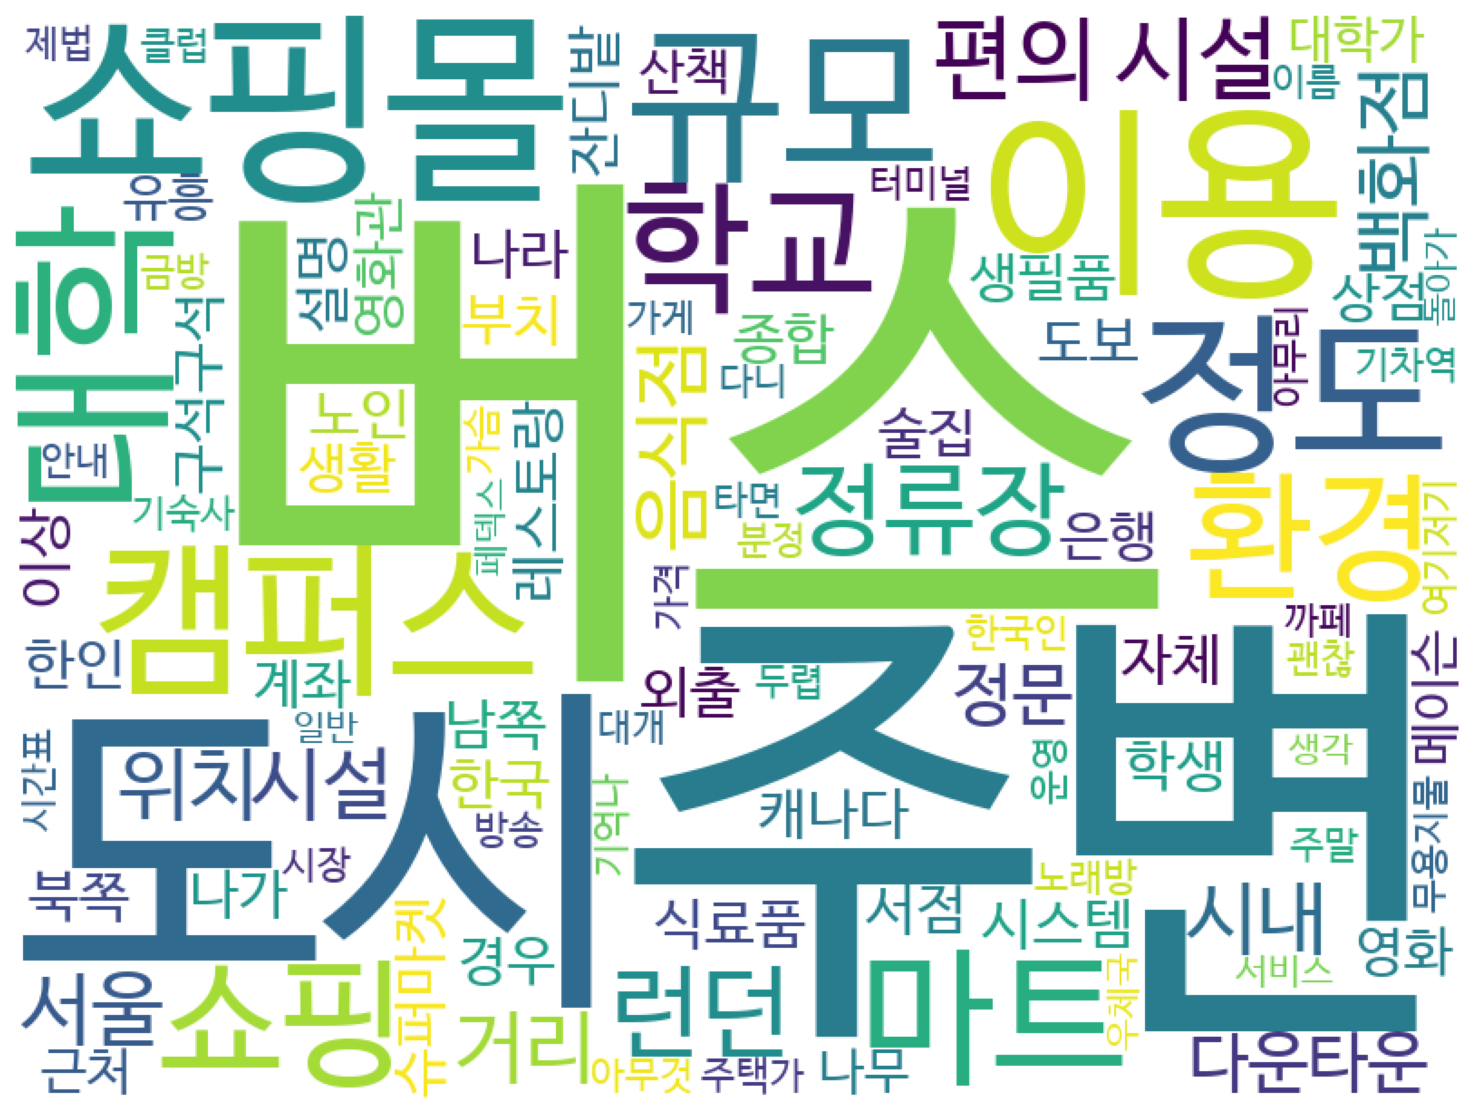

In [80]:
# 빈도수 별로 단어를 크게 표시한다
str_keywords = ' '.join(mecab_keywords)
wordcloud.generate(str_keywords)
plt.figure(figsize = (15 , 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show() 

## use konlpy okt for tokenizing
### wordcloud generation considering frequency

In [81]:
from konlpy.tag import Okt
okt_tokenizer = Okt()

def okt_kor_tokenizer(raw, stopwords):
    # position arguments(or position tags): 내가 뽑아내고 싶은 형태소들
    twitter_pos = ["Noun", "Alpha", "Verb", "Number", "Adverb"]
    twitter_list = [
        word
        # normalize 그랰ㅋㅋ -> 그래ㅋㅋ  # stemming 바뀌나->바뀌다
        for word, tag in okt_tokenizer.pos(raw, norm=True, stem=True)
        if len(word) > 1 and tag in twitter_pos and word not in stopwords
    ]
    return twitter_list

# combine extracted noun and verb list without overlapping

In [82]:
okt_words = okt_kor_tokenizer(summary, stopwords_list)
okt_words[:10]

['주변', '마트', '주택가', '버스', '백화점', '주변', '식료품점', '서점', '백화점', '버스']

In [83]:
# Okt divided nouns list term frequency
okt_words_counted = Counter(okt_words)
print("number of counted words:", len(okt_words_counted))
okt_words_counted.most_common(100)

number of counted words: 252


[('하다', 35),
 ('버스', 12),
 ('주변', 11),
 ('시설', 8),
 ('쇼핑몰', 7),
 ('이용', 7),
 ('보다', 6),
 ('부치다', 5),
 ('캠퍼스', 5),
 ('마트', 4),
 ('쇼핑', 4),
 ('다니다', 4),
 ('환경', 4),
 ('않다', 4),
 ('런던', 4),
 ('몰다', 4),
 ('편의', 4),
 ('백화점', 3),
 ('시내', 3),
 ('편이', 3),
 ('타다', 3),
 ('크다', 3),
 ('위치', 3),
 ('규모', 3),
 ('거리', 3),
 ('서울', 3),
 ('떨어지다', 3),
 ('음식점', 3),
 ('가다', 3),
 ('다운타운', 3),
 ('되다', 3),
 ('정문', 3),
 ('주택가', 2),
 ('식료품점', 2),
 ('서점', 2),
 ('이상', 2),
 ('가야', 2),
 ('도보', 2),
 ('북쪽', 2),
 ('남쪽', 2),
 ('레스토랑', 2),
 ('외출', 2),
 ('구석구석', 2),
 ('익숙해지다', 2),
 ('시스템', 2),
 ('설명', 2),
 ('해주다', 2),
 ('정류장', 2),
 ('모르다', 2),
 ('한인', 2),
 ('슈퍼마켓', 2),
 ('캐나다', 2),
 ('자체', 2),
 ('노인', 2),
 ('나가야', 2),
 ('우리나라', 2),
 ('잔디밭', 2),
 ('생필품', 2),
 ('영화관', 2),
 ('영화', 2),
 ('은행', 2),
 ('계좌', 2),
 ('군데', 2),
 ('소규모', 2),
 ('상점', 2),
 ('로만', 2),
 ('몰이', 2),
 ('술집', 2),
 ('대학가', 2),
 ('나무', 2),
 ('산책', 2),
 ('유흥', 2),
 ('근처', 2),
 ('버스정류장', 2),
 ('메이슨', 2),
 ('빌다', 2),
 ('대개', 1),
 ('주말', 1),
 ('가격', 1),
 ('걸다', 1)

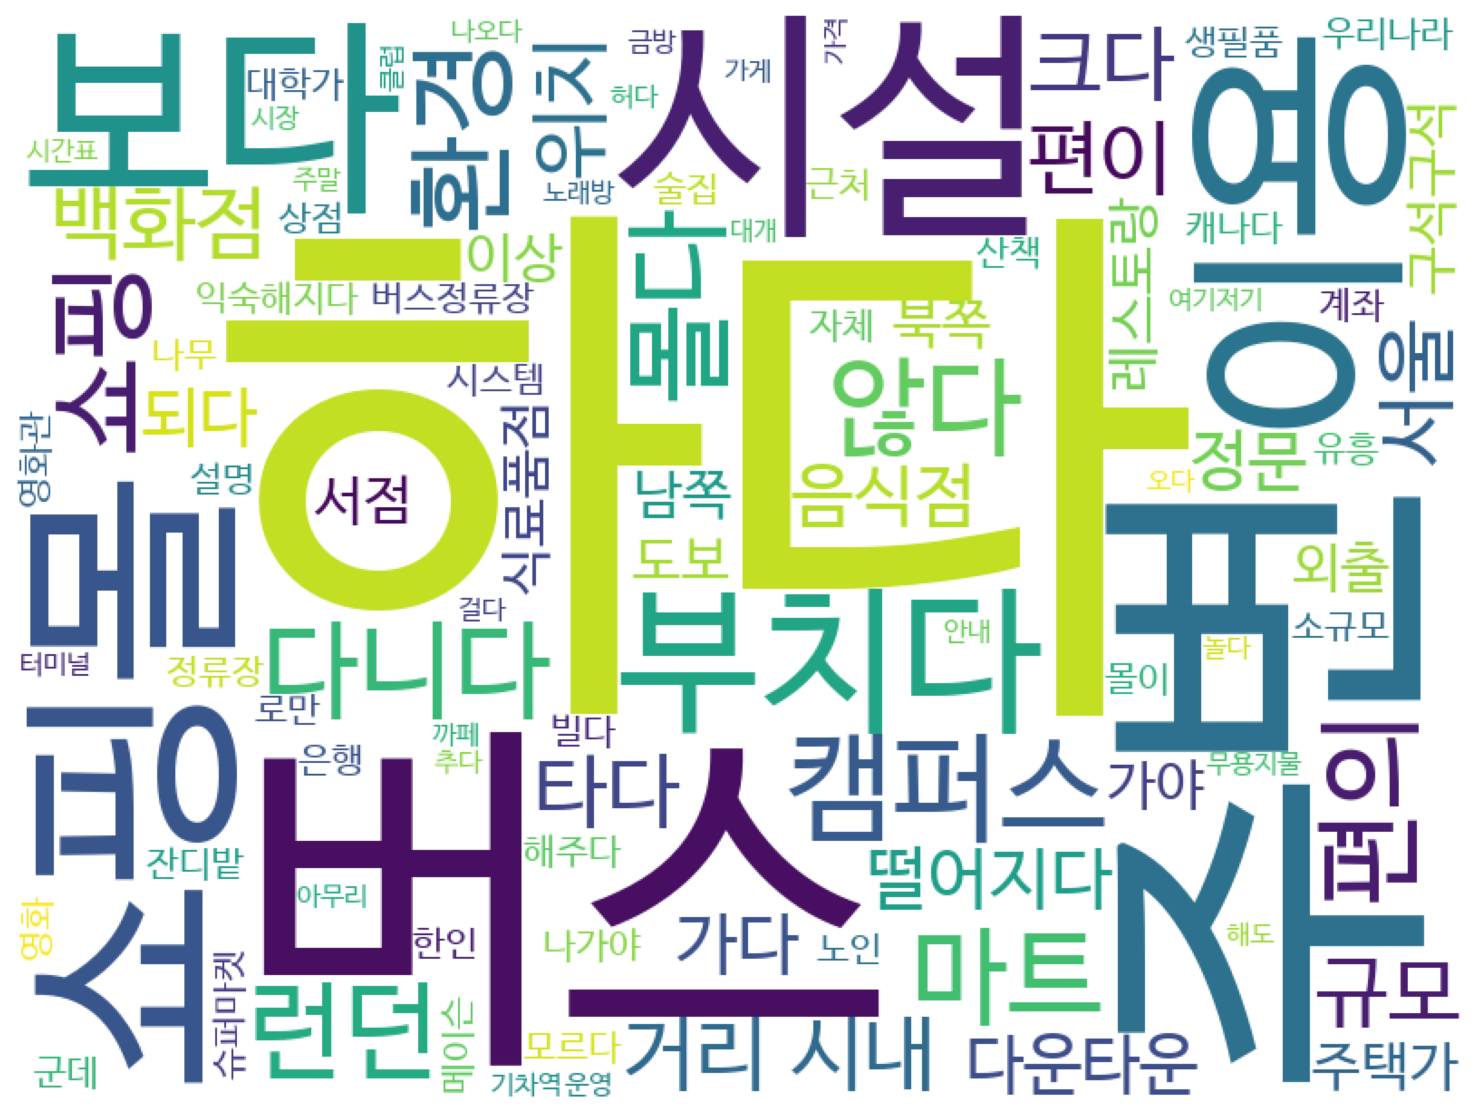

In [84]:
# 빈도수 별로 단어를 크게 표시한다
wordcloud.generate_from_frequencies(frequencies = okt_words_counted) # mecab으로 추출한 명사로 워드클라우드를 그린다.
plt.figure(figsize = (15 , 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show() 